In [1]:
import tensorflow as ts
from tensorflow import keras
import numpy as np
import tensorflow.keras.backend as K

2023-04-17 18:54:45.321618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
def minha_funcao_de_perda(y_true, y_pred):
    a, beta, e, x0, T = 0.0, 2.0, 1.0, 5.0, 1.0,   # adicionado ponto decimal aos valores inteiros
    
    # calcular a diferença y_pred[i] - c * sum(y_pred)
    # hs = 0.02
    # diff =  beta * e * (T + x0 - a) - y_pred - hs*beta * e * K.sum(y_pred, axis=1, keepdims=True)

    n = K.int_shape(y_pred)[1]
    h = 1.0 / n
    trapezoids = h / 2.0 * (y_pred[:, 0] + y_pred[:, n-1] + 2 * K.sum(y_pred[:, 1:n-1], axis=1))
    diff = y_pred - beta*e*(T+x0-a)+beta*e * trapezoids[:, None]
    
    # calcular a norma L2 para cada exemplo
    norma = K.sqrt(K.sum(K.square(diff), axis=1))
    
    # retornar a média da norma L2 sobre todos os exemplos de treinamento
    return K.mean(norma)

def minha_funcao_de_perda2(y_true, y_pred):
    a, beta, e, x0, T = 0.0, 2.0, 1.0, 5.0, 1.0,   # adicionado ponto decimal aos valores inteiros
    
    # calcular a diferença y_pred[i] - c * sum(y_pred)
    n = K.int_shape(y_pred)[1]
    hs = 1.0 / n
    diff =  beta * e * (T + x0 - a) - y_pred - hs*beta * e * K.sum(y_pred, axis=1, keepdims=True)
    
    # calcular a norma L2 para cada exemplo
    norma = K.sqrt(K.sum(K.square(diff), axis=1))
    
    # retornar a média da norma L2 sobre todos os exemplos de treinamento
    return K.mean(norma)

def minha_funcao_de_perda3(y_true, y_pred):
    a, beta, e, x0, T = 0.0, 2.0, 1.0, 5.0, 1.0,   # adicionado ponto decimal aos valores inteiros
    
    # calcular a diferença y_pred[i] - c * sum(y_pred)
    n = K.int_shape(y_pred)[1]
    hs = 1.0 / (n+1)
    diff =  y_pred - 2.0 - hs*K.cumsum(y_pred, axis=1)
    
    # calcular a norma L2 para cada exemplo
    norma = K.sqrt(K.sum(K.square(diff), axis=1))
    
    # retornar a média da norma L2 sobre todos os exemplos de treinamento
    return K.mean(norma)




In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer

# Tamanho da entrada
n = 100

# Número de neurônios nas camadas ocultas
n1 = 5
# n2 = 2

# Criação do modelo
model = Sequential()

# Adicionando as camadas ao modelo
model.add(InputLayer(input_shape=(n,)))
model.add(Dense(n1, activation='relu'))
# model.add(Dense(n2, activation='relu'))
model.add(Dense(n, activation='linear'))

# Compilando o modelo
model.compile(loss=minha_funcao_de_perda2, optimizer='adam')

# Dados de treinamento
X_train = np.linspace(0,1,n).reshape(1,n)
y_train = np.linspace(0,1,n).reshape(1,n)

# Treinando o modelo
model.fit(X_train, y_train, epochs=2000)

# Fazendo uma previsão
y_pred = model.predict(X_train).ravel()


Epoch 1/2000
1/1 [==============================] - 1s 693ms/step - loss: 119.3738
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 119.2047
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 119.0361
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 118.8680
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 118.7000
Epoch 6/2000
1/1 [==============================] - 0s 15ms/step - loss: 118.5319
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 118.3630
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 118.1922
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 118.0253
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 117.8539
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 117.6746
Epoch 12/2000
1/1 [==============================] - 0s 11ms/step - loss: 117.4864
Epoch 13/2000
1/1 [=

In [7]:
y_pred

array([4.0003977, 4.000397 , 4.000396 , 4.0003963, 4.0003977, 4.0004025,
       4.0003943, 4.0004015, 4.000395 , 4.000396 , 4.0003943, 4.0003967,
       4.0004025, 4.0003967, 4.0004   , 4.0003953, 4.000397 , 4.000394 ,
       4.000402 , 4.0003967, 4.0003877, 4.0004034, 4.000403 , 4.000404 ,
       4.000394 , 4.0003943, 4.0003963, 4.0003967, 4.000393 , 4.0004   ,
       4.000394 , 4.0003943, 4.000393 , 4.0004015, 4.0004015, 4.000391 ,
       4.0003877, 4.000396 , 4.0004034, 4.000398 , 4.0004034, 4.0003996,
       4.0003967, 4.000396 , 4.0003996, 4.000393 , 4.0003924, 4.0003953,
       4.0003943, 4.0003867, 4.0003986, 4.0003953, 4.000392 , 4.000397 ,
       4.0003977, 4.000393 , 4.0003986, 4.000398 , 4.000394 , 4.0004034,
       4.0004005, 4.0004005, 4.000393 , 4.000404 , 4.000388 , 4.0003996,
       4.0003963, 4.000401 , 4.000403 , 4.0003967, 4.000395 , 4.000398 ,
       4.000395 , 4.0003943, 4.0003934, 4.0003924, 4.000393 , 4.000398 ,
       4.0003905, 4.000396 , 4.000396 , 4.0004034, 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.subplot()
sns.lineplot(x = np.linspace(0,1,n),y=y_pred,ax=ax)
ax.set(ylim=[3,5],xlim=[0,1],xlabel="$t$",ylabel="$x^2$")


In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer

# Tamanho da entrada
n = 100

# Número de neurônios nas camadas ocultas
n1 = 5
n2 = 5

# Criação do modelo
model = Sequential()

# Adicionando as camadas ao modelo
model.add(InputLayer(input_shape=(n,)))
model.add(Dense(n1, activation='relu'))
model.add(Dense(n2, activation='relu'))
model.add(Dense(n, activation='linear'))

# Compilando o modelo
model.compile(loss=minha_funcao_de_perda3, optimizer='adam')

# Dados de treinamento
X_train = np.linspace(0,1,n).reshape(1,n)
y_train = np.linspace(0,1,n).reshape(1,n)

# Treinando o modelo
model.fit(X_train, y_train, epochs=1000)

# Fazendo uma previsão
y_pred = model.predict(X_train).ravel()

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 20.0203
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 20.0056
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 19.9932
Epoch 4/1000
1/1 [==============================] - 0s 60ms/step - loss: 19.9818
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 19.9713
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 19.9617
Epoch 7/1000
1/1 [==============================] - 0s 43ms/step - loss: 19.9528
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 19.9440
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 19.9341
Epoch 10/1000
1/1 [==============================] - 0s 19ms/step - loss: 19.9233
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 19.9115
Epoch 12/1000
1/1 [==============================] - 0s 20ms/step - loss: 19.8986
Epoch 13/1000
1/1 [=========

In [7]:
# y_pteste = np.array([[1.0,1.0,1.0,1.0,1.0,1.0,1.0]])
# loss=minha_funcao_de_perda3(y_pteste,y_pteste)
# loss
y_pred

array([2.0182571, 2.039803 , 2.0608828, 2.0815084, 2.1029682, 2.1234493,
       2.1515522, 2.1650195, 2.1900253, 2.2113986, 2.2300136, 2.2543955,
       2.276025 , 2.3006763, 2.31695  , 2.3520532, 2.3721726, 2.3975468,
       2.422561 , 2.4441776, 2.471371 , 2.495692 , 2.5167952, 2.5445914,
       2.5638995, 2.597244 , 2.6258488, 2.6496856, 2.67703  , 2.7037907,
       2.7297194, 2.7541413, 2.7877421, 2.8153534, 2.8422732, 2.8732872,
       2.9088428, 2.9294145, 2.9543707, 2.9967017, 3.0154803, 3.0513725,
       3.0853004, 3.1100488, 3.145682 , 3.175044 , 3.2042902, 3.245142 ,
       3.2708983, 3.3052986, 3.3391674, 3.3752801, 3.4088025, 3.4379313,
       3.4758785, 3.5112433, 3.5499349, 3.5782301, 3.6217258, 3.651551 ,
       3.69611  , 3.731279 , 3.7647   , 3.8046145, 3.839716 , 3.8844075,
       3.9214783, 3.961788 , 3.999337 , 4.0403595, 4.0792203, 4.1195397,
       4.167521 , 4.209739 , 4.248053 , 4.2968965, 4.3404202, 4.3819556,
       4.4260373, 4.4728575, 4.521935 , 4.5589056, 

<AxesSubplot: >

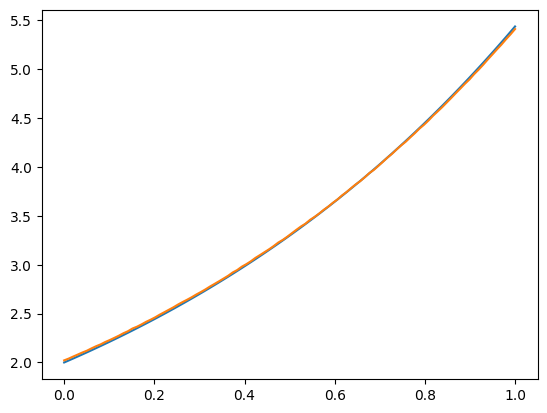

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
x = np.linspace(0,1,n)
y = 2*np.exp(x)
fig,ax = plt.subplots()
sns.lineplot(x=x,y=y,ax=ax)
sns.lineplot(x=x,y=y_pred,ax=ax)